# Discriminant Analysis Countries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sns.set_style("whitegrid")

In [2]:
cities = pd.read_excel("./data/citydata.xlsx", sheet_name='cities', dtype={'faultCode': 'category'})
cities.head()

,Country,Latitude,Longitude
0,Netherlands,52.0800,4.2700
1,Belgium,50.8333,4.3333
2,Netherlands,52.3500,4.9166
3,France,48.8667,2.3333
4,Belgium,51.0500,3.7333


In [3]:
cborders_1 = pd.read_excel("./data/citydata.xlsx", sheet_name='cborders_1', header=None)
cborders_2 = pd.read_excel("./data/citydata.xlsx", sheet_name='cborders_2', header=None)
cborders_3 = pd.read_excel("./data/citydata.xlsx", sheet_name='cborders_3', header=None)
cborders_4 = pd.read_excel("./data/citydata.xlsx", sheet_name='cborders_4', header=None)

This function is used to plot the country boundaries along with the classification predictions given by the model.

In [4]:
def plotBoundaries(model, cities, cborders_1, cborders_2, cborders_3, cborders_4):
    # Make a grid of predictor points
    x, y = np.meshgrid(np.linspace(2, 8, num=100), np.linspace(48, 54, num=100))
    # Apply the model
    predictions = model.predict(pd.DataFrame(data={'Latitude': y.ravel(), 'Longitude': x.ravel()}))
    # Visualize results
    plt.figure()
    sns.scatterplot(data=cities, x='Longitude', y='Latitude', hue='Country', palette=['red', 'green', 'blue', 'magenta'])
    plt.plot(cborders_1.iloc[:, 0], cborders_1.iloc[:, 1], color='black')
    plt.plot(cborders_2.iloc[:, 0], cborders_2.iloc[:, 1], color='black')
    plt.plot(cborders_3.iloc[:, 0], cborders_3.iloc[:, 1], color='black')
    plt.plot(cborders_4.iloc[:, 0], cborders_4.iloc[:, 1], color='black')
    plt.contourf(x, y, LabelEncoder().fit_transform(predictions).reshape(x.shape), alpha=0.2, cmap=ListedColormap(('green', 'blue', 'magenta', 'red')))
    plt.xlim(2, 8)
    plt.ylim(48, 54)
    plt.show()

Fit a default Discriminant Analysis classifier and visualize boundaries for later comparison.

In [5]:
model = LinearDiscriminantAnalysis()
model.fit(cities.iloc[:, 1:], cities.iloc[:, 0])

LinearDiscriminantAnalysis()

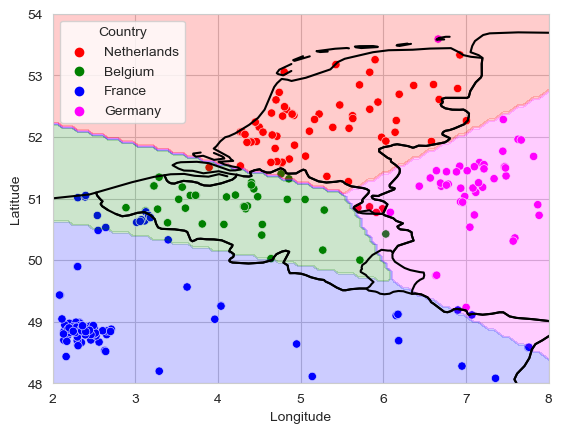

In [6]:
plotBoundaries(model, cities, cborders_1, cborders_2, cborders_3, cborders_4)

Discriminant analysis needs data sufficient to fit Gaussian models with invertible covariance matrices. If our data is not sufficient, we can use the [QuadraticDiscriminantAnalysis()](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn-discriminant-analysis-quadraticdiscriminantanalysis) class.

In [7]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
model.fit(cities.iloc[:, 1:], cities.iloc[:, 0])

QuadraticDiscriminantAnalysis()

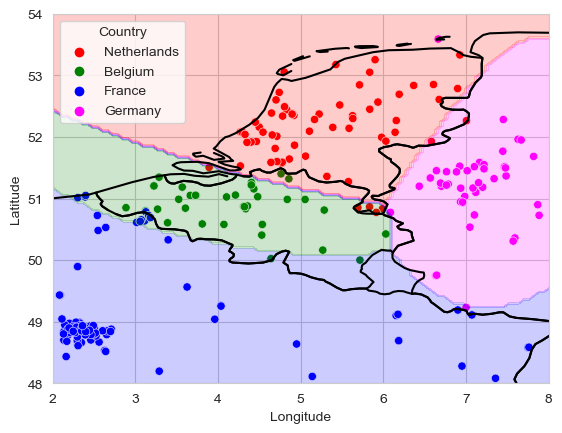

In [8]:
plotBoundaries(model, cities, cborders_1, cborders_2, cborders_3, cborders_4)